<a href="https://colab.research.google.com/github/ellabam/learning-java/blob/master/practice%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy as sp
import scipy.spatial.distance as spd
import scipy.cluster.hierarchy as sph
import sklearn as sk
import sklearn.cluster as skc
import sklearn.metrics as skm
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from random import randint
from sklearn.naive_bayes import GaussianNB


%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True, font_scale=1.3)

%pip install openpyxl==3.0.9

In [2]:
colors_set_full = pd.read_excel('https://drive.google.com/uc?export=download&id=1EppL5Cy4YSND45x--HV3yKavszTu2ALB')
# change empty cells to zero
colors_set_full.fillna(0, inplace=True)


In [3]:
# we'll just focus on 10 of the most popular themes.
colors_set = colors_set_full[(colors_set_full["Theme"] == "Technic") | 
                        (colors_set_full["Theme"] == "Friends") |
                        (colors_set_full["Theme"] == "City") |
                        (colors_set_full["Theme"] == "Basic Set") |
                        (colors_set_full["Theme"] == "Creator") |
                        (colors_set_full["Theme"] == "Duplo") |
                        (colors_set_full["Theme"] == "Star Wars") |
                        (colors_set_full["Theme"] == "Ninjago") |
                        (colors_set_full["Theme"] == "Construction") |
                        (colors_set_full["Theme"] == "Airport")]

In [4]:

colors_set.head(5)


,Set Num,Set Name,Theme,Year,Num Parts,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,Bright Light Blue,Bright Light Orange,Bright Light Yellow,Bright Pink,Brown,Chrome Antique Brass,Chrome Black,Chrome Blue,Chrome Gold,Chrome Green,Chrome Pink,Chrome Silver,Copper,Dark Azure,Dark Blue,Dark Blue-Violet,Dark Bluish Gray,Dark Brown,Dark Flesh,Dark Gray,Dark Green,Dark Orange,Dark Pink,Dark Purple,Dark Red,Dark Tan,Dark Turquoise,Earth Orange,Fabuland Brown,...,Royal Blue,Rust,Salmon,Sand Blue,Sand Green,Sand Purple,Sand Red,Sky Blue,Speckle Black-Copper,Speckle Black-Gold,Speckle Black-Silver,Speckle DBGray-Silver,Tan,Trans Light Royal Blue,Trans-Black,Trans-Bright Green,Trans-Clear,Trans-Dark Blue,Trans-Dark Pink,Trans-Green,Trans-Light Blue,Trans-Light Purple,Trans-Medium Blue,Trans-Neon Green,Trans-Neon Orange,Trans-Neon Yellow,Trans-Orange,Trans-Pink,Trans-Purple,Trans-Red,Trans-Very Lt Blue,Trans-Yellow,Unknown,Very Light Bluish Gray,Very Light Gray,Very Light Orange,Violet,White,Yellow,Yellowish Green
4,2823692,Simple and Motorized Machines Activity Pack,Technic,1997,24,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2818944,Structures Set,Technic,1997,439,20.0,0.0,116.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,2814926,Technology Activity Set,Technic,1994,318,17.0,0.0,92.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0
11,2815291,Teacher's Guide for Technology Group Activity Set,Technic,1994,16,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,951-2,Lego TC logo Starter Pack,Technic,1988,16,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
colors_set_norm = colors_set.copy()
colors_set_norm  = colors_set_norm .drop([ 'Set Name', 'Set Num', 'Theme', 'Year', 'Num Parts'], axis=1)
colors_set_norm.head(3)

,[No Color],Aqua,Black,Blue,Blue-Violet,Bright Green,Bright Light Blue,Bright Light Orange,Bright Light Yellow,Bright Pink,Brown,Chrome Antique Brass,Chrome Black,Chrome Blue,Chrome Gold,Chrome Green,Chrome Pink,Chrome Silver,Copper,Dark Azure,Dark Blue,Dark Blue-Violet,Dark Bluish Gray,Dark Brown,Dark Flesh,Dark Gray,Dark Green,Dark Orange,Dark Pink,Dark Purple,Dark Red,Dark Tan,Dark Turquoise,Earth Orange,Fabuland Brown,Flat Dark Gold,Flat Silver,Flesh,Glitter Trans-Clear,Glitter Trans-Dark Pink,...,Royal Blue,Rust,Salmon,Sand Blue,Sand Green,Sand Purple,Sand Red,Sky Blue,Speckle Black-Copper,Speckle Black-Gold,Speckle Black-Silver,Speckle DBGray-Silver,Tan,Trans Light Royal Blue,Trans-Black,Trans-Bright Green,Trans-Clear,Trans-Dark Blue,Trans-Dark Pink,Trans-Green,Trans-Light Blue,Trans-Light Purple,Trans-Medium Blue,Trans-Neon Green,Trans-Neon Orange,Trans-Neon Yellow,Trans-Orange,Trans-Pink,Trans-Purple,Trans-Red,Trans-Very Lt Blue,Trans-Yellow,Unknown,Very Light Bluish Gray,Very Light Gray,Very Light Orange,Violet,White,Yellow,Yellowish Green
4,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,20.0,0.0,116.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,17.0,0.0,92.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0


In [6]:
color_train, color_test, thm_train, thm_test = sk.model_selection.train_test_split(
 colors_set_norm,colors_set['Theme'], test_size=0.3, random_state=1000)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(color_train)

color_train = scaler.transform(color_train)
color_test = scaler.transform(color_test)

K-Nearest Neighbors

In [76]:
n=3

In [51]:
#lego_neigh = KNeighborsClassifier(n_neighbors=n)
#lego_neigh.fit(colors_set_norm, colors_set['Theme'])
#lego_neigh_predictions = lego_neigh.predict(colors_set_norm)
#lego_neigh_predictions

In [77]:
lego_neigh = KNeighborsClassifier(n_neighbors=n)
lego_neigh.fit(color_train, thm_train)

lego_color_predictions_test =  lego_neigh.predict(color_test)
lego_color_predictions_test

array(['Friends', 'Airport', 'Basic Set', 'City', 'City', 'Duplo', 'City',
       'Friends', 'Technic', 'Technic', 'Friends', 'Basic Set',
       'Construction', 'City', 'Star Wars', 'Star Wars', 'Creator',
       'Airport', 'Technic', 'Friends', 'Airport', 'Creator', 'Friends',
       'Technic', 'Technic', 'City', 'Construction', 'Airport',
       'Construction', 'Technic', 'Technic', 'Basic Set', 'Construction',
       'Technic', 'Technic', 'Technic', 'Duplo', 'Duplo', 'Technic',
       'Duplo', 'City', 'Technic', 'Technic', 'Duplo', 'Duplo',
       'Star Wars', 'City', 'Friends', 'City', 'City', 'City',
       'Basic Set', 'Construction', 'Airport', 'Airport', 'City',
       'Technic', 'Basic Set', 'Duplo', 'Technic', 'Creator', 'Technic',
       'Construction', 'Technic', 'City', 'Ninjago', 'Duplo', 'Airport',
       'Technic', 'Basic Set', 'Friends', 'Technic', 'Duplo', 'City',
       'City', 'Technic', 'Ninjago', 'Creator', 'Technic', 'Technic',
       'Friends', 'Basic Set', 'Du

In [78]:
#Accuracy
knn_ac=skm.accuracy_score(y_true=thm_test,
                   y_pred=lego_color_predictions_test)
knn_ac

0.6582984658298466

In [79]:
# Precision
knn_pr=skm.precision_score(y_true=thm_test,
                    y_pred=lego_color_predictions_test,
                    average='weighted')
knn_pr

0.6964986658717522

In [80]:
# Recall
knn_rc=skm.recall_score(y_true=thm_test,
                 y_pred=lego_color_predictions_test,
                 average='weighted')
knn_rc

0.6582984658298466

In [81]:
# F1 Score
knn_f1=skm.f1_score(y_true=thm_test,
             y_pred=lego_color_predictions_test,
             average='weighted')
knn_f1

0.6583501027259537

In [82]:
# Compute the confusion matrix
lego_neigh_cfmat = skm.confusion_matrix(
    y_true=thm_test,
    y_pred=lego_color_predictions_test,)
lego_neigh_cfmat

array([[ 27,   1,   3,   3,   4,   0,   0,   0,   0,   2],
       [  3,  61,   2,   4,   1,   2,   0,   0,   0,   3],
       [  3,   0,  46,   4,   7,   2,   2,   1,   1,   4],
       [  9,   1,   5,  35,   1,   0,   0,   0,   1,   0],
       [ 10,   7,  12,   2,  32,   3,   0,   0,   2,   5],
       [  1,   4,   3,   2,   0,  51,   2,   0,   0,   2],
       [  1,   0,   9,   0,   3,   3,  53,   1,   2,   0],
       [  3,   1,  11,   0,   2,   1,   2,  37,   1,   2],
       [  8,   0,  25,   4,   4,   1,   5,   2,  19,   5],
       [  6,   3,   3,   4,   2,   3,   1,   2,   1, 111]])

Text(0.5, 1.0, 'Confusion Matrix kNN')

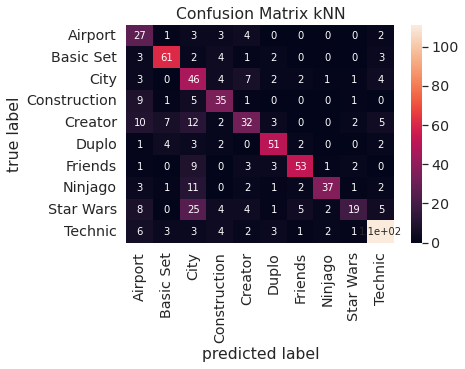

In [84]:
# Visualize the confusion matrix
sns.heatmap(lego_neigh_cfmat, 
            xticklabels=lego_neigh.classes_,
            yticklabels=lego_neigh.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix kNN')

Naive Bayes

In [59]:
lego_gnb = GaussianNB().fit(color_train, thm_train)
lego_gnb_predictions = lego_gnb.predict(color_test)
lego_gnb_predictions

array(['Friends', 'Technic', 'Technic', 'Technic', 'Technic', 'Duplo',
       'Technic', 'Friends', 'Technic', 'Technic', 'Friends', 'Creator',
       'Construction', 'City', 'Star Wars', 'Friends', 'Technic',
       'Airport', 'Technic', 'Friends', 'Airport', 'Technic', 'Friends',
       'Technic', 'Technic', 'Technic', 'Airport', 'Airport', 'Technic',
       'Technic', 'Creator', 'Technic', 'Technic', 'Airport', 'Technic',
       'Technic', 'Duplo', 'Duplo', 'Technic', 'City', 'City', 'Technic',
       'Technic', 'Construction', 'Friends', 'Technic', 'Technic',
       'Friends', 'City', 'Creator', 'Technic', 'Creator', 'Technic',
       'Technic', 'Technic', 'Technic', 'Technic', 'Technic', 'Duplo',
       'Technic', 'Creator', 'Technic', 'Construction', 'Technic',
       'Technic', 'Technic', 'Duplo', 'Airport', 'Technic', 'Airport',
       'Friends', 'Technic', 'City', 'Technic', 'Airport', 'Technic',
       'Ninjago', 'City', 'Technic', 'Technic', 'Friends', 'Basic Set',
       'T

In [60]:
#Accuracy
nb_ac=skm.accuracy_score(y_true=thm_test,
                   y_pred=lego_gnb_predictions)
nb_ac

0.4407252440725244

In [61]:
# Precision
nb_pr=skm.precision_score(y_true=thm_test,
                    y_pred=lego_gnb_predictions,
                    average='weighted')
nb_pr

0.508081708189621

In [62]:
# Recall
nb_rc=skm.recall_score(y_true=thm_test,
                 y_pred=lego_gnb_predictions,
                 average='weighted')
nb_rc

0.4407252440725244

In [63]:
# F1 Score
nb_f1=skm.f1_score(y_true=thm_test,
             y_pred=lego_gnb_predictions,
             average='weighted')
nb_f1

0.4042765045949859

In [64]:
# Compute the confusion matrix
lego_neigh_cfmat = skm.confusion_matrix(
    y_true=thm_test,
    y_pred=lego_gnb_predictions,)
lego_neigh_cfmat

array([[ 19,   0,   6,   1,   1,   0,   0,   0,   0,  13],
       [ 14,   4,   0,   7,  15,   2,   1,   0,   0,  33],
       [  2,   0,  22,   3,   0,   0,   1,   0,   0,  42],
       [  6,   0,   3,   6,   1,   0,   0,   0,   0,  36],
       [ 10,   2,  20,   2,  13,   0,   3,   0,   1,  22],
       [  1,   1,   4,   7,   1,  29,   9,   0,   1,  12],
       [  0,   0,   5,   3,   3,   6,  51,   0,   0,   4],
       [  0,   0,  11,   5,   4,   0,   2,  32,   1,   5],
       [  3,   0,  19,   1,   1,   0,  13,   1,  13,  22],
       [  2,   2,   1,   1,   3,   0,   0,   0,   0, 127]])

Text(0.5, 1.0, 'Confusion Matrix NB')

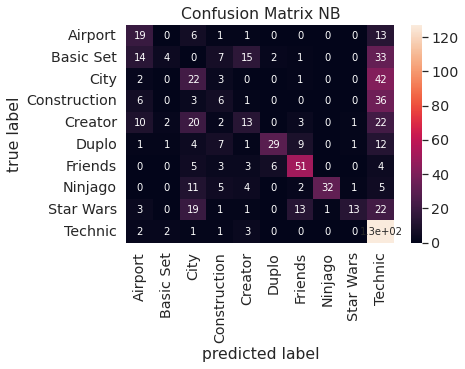

In [65]:
# Visualize the confusion matrix
sns.heatmap(lego_neigh_cfmat, 
            xticklabels=lego_neigh.classes_,
            yticklabels=lego_neigh.classes_,
            annot=True)
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.title('Confusion Matrix NB')

In [66]:
data = {'KNN':[knn_ac, knn_pr, knn_rc, knn_f1], 'NaiveBayes':[nb_ac, nb_pr, nb_rc, nb_f1]}  
  
# Creates pandas DataFrame.  
df = pd.DataFrame(data, index =['Accuracy', 'Precision', 'Recall', 'F1score'])

df

,KNN,NaiveBayes
Accuracy,0.652720,0.440725
Precision,0.690573,0.508082
Recall,0.652720,0.440725
F1score,0.651039,0.404277


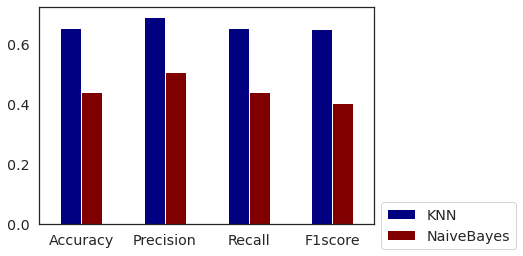

In [67]:
df.plot.bar(rot=0,color={"KNN": "navy", "NaiveBayes": "maroon"})

plt.legend(bbox_to_anchor=(1.02, 0.1), loc='upper left', borderaxespad=0)


Minimum error:- 0.3333333333333333 at K = 0


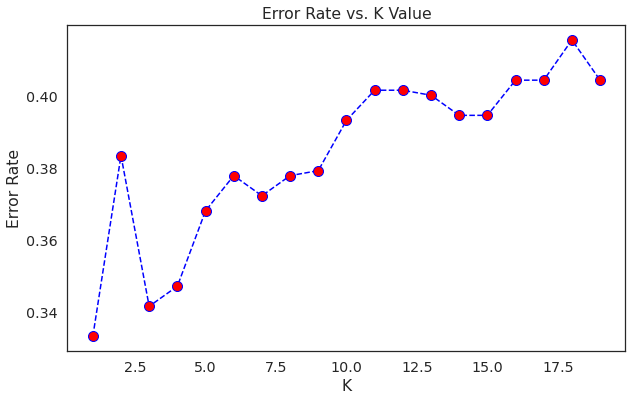

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
 

error_rate = []
for i in range(1,20):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(color_train,thm_train)
 pred_i = knn.predict(color_test)
 error_rate.append(np.mean(pred_i != thm_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [69]:
error_rate

[0.3333333333333333,
 0.38354253835425384,
 0.3417015341701534,
 0.3472803347280335,
 0.3682008368200837,
 0.37796373779637377,
 0.3723849372384937,
 0.37796373779637377,
 0.3793584379358438,
 0.39330543933054396,
 0.401673640167364,
 0.401673640167364,
 0.400278940027894,
 0.3947001394700139,
 0.3947001394700139,
 0.40446304044630405,
 0.40446304044630405,
 0.41562064156206413,
 0.40446304044630405]

Text(0, 0.5, 'Mean Error')

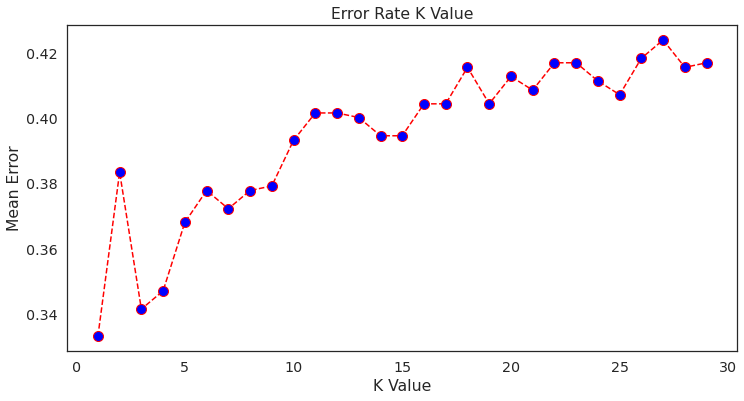

In [75]:
error=[]
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(color_train, thm_train)
    pred_i = knn.predict(color_test)
    error.append(np.mean(pred_i != thm_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [73]:
error

[0.3333333333333333,
 0.38354253835425384,
 0.3417015341701534,
 0.3472803347280335,
 0.3682008368200837,
 0.37796373779637377,
 0.3723849372384937,
 0.37796373779637377,
 0.3793584379358438,
 0.39330543933054396,
 0.401673640167364,
 0.401673640167364,
 0.400278940027894,
 0.3947001394700139,
 0.3947001394700139,
 0.40446304044630405,
 0.40446304044630405,
 0.41562064156206413,
 0.40446304044630405,
 0.41283124128312415,
 0.4086471408647141,
 0.41701534170153415,
 0.41701534170153415,
 0.41143654114365413,
 0.4072524407252441,
 0.41841004184100417,
 0.42398884239888424,
 0.41562064156206413,
 0.41701534170153415,
 0.41422594142259417,
 0.42398884239888424,
 0.4281729428172943,
 0.43654114365411434,
 0.4351464435146444,
 0.4435146443514644,
 0.44630404463040446,
 0.45188284518828453,
 0.45188284518828453,
 0.45327754532775455]